In [1]:
import numpy as np

# This is the same toy function used in the example of backprop in understanding deep learning
def teaching_function(beta: np.ndarray, omega: np.ndarray):
    def fn_x_only(x):
        return beta[3] + omega[3] * np.cos(
            beta[2] + omega[2] * np.exp(
                beta[1] + omega[1] * np.sin(
                    beta[0] + omega[0] * x
                )
            )
        )
    return fn_x_only

def create_dataset(size:int, fn):
    x = np.linspace(-5, 5, size)
    y_clean = fn(x)
    y_noisy = y_clean + np.random.normal(0, 0.1, size=x.shape)  # add small noise

    return x.reshape((1,size)), y_noisy.reshape((1,size))

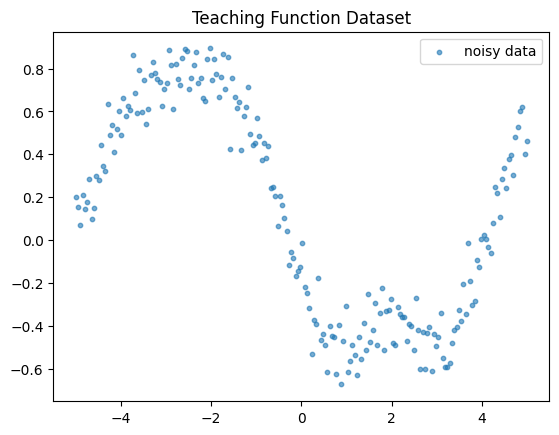

In [2]:
import matplotlib.pyplot as plt

np.random.seed(42)

beta = np.random.uniform(-1, 1, size=4)
omega = np.random.uniform(-1, 1, size=4)
x,y_noisy = create_dataset(200,teaching_function(beta,omega))
#x,y_noisy = create_dataset(200,lambda x: -x+1)

plt.scatter(x, y_noisy, s=10, alpha=0.6, label="noisy data")
plt.legend()
plt.title("Teaching Function Dataset")
plt.show()

In [3]:
from rafael_nn import Linear, MeanSquaredError, NeuralNetwork, GradientDescent, StochasticGradientDescend
np.random.seed(0)

def print_weights(nn):
    for layer in nn.layers:
        print(layer)
        print("weight",layer.weights)
        print("bias",layer.biases,"\n")

n_layers = 3
n_by_layer = 30
layers= [Linear(1,n_by_layer)] + [Linear(n_by_layer,n_by_layer) for _ in range(n_layers-1)] + [Linear(n_by_layer,1)]

loss_fn = MeanSquaredError()
nn = NeuralNetwork(layers, optimizer=StochasticGradientDescend(0.01,20), loss_fn=loss_fn)


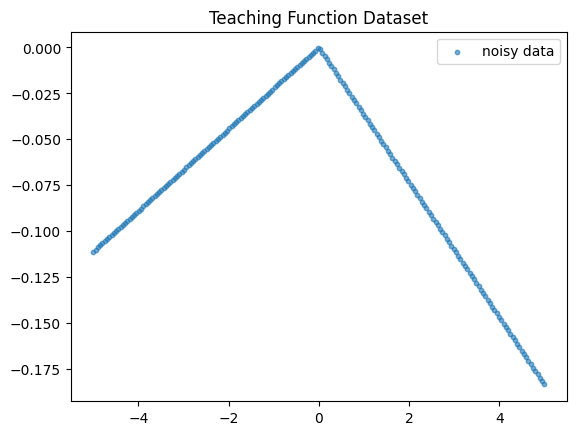

In [4]:
y_pred = nn(x)

plt.scatter(x, y_pred, s=10, alpha=0.6, label="noisy data")
plt.legend()
plt.title("Teaching Function Dataset")
plt.show()

In [5]:
nn.train(x,y_noisy)

[[0.12596138]]


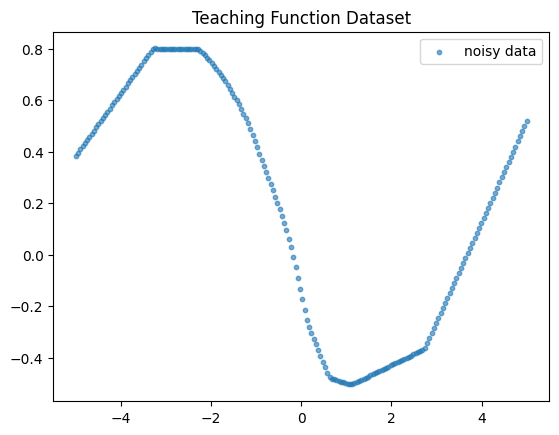

In [6]:
y_pred = nn(x)
print(nn(np.array([[4]])))

plt.scatter(x, y_pred, s=10, alpha=0.6, label="noisy data")
plt.legend()
plt.title("Teaching Function Dataset")
plt.show()